In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import *
from pylab import *
import seaborn as sb
from bokeh.io import output_notebook
output_notebook()
from bokeh.plotting import figure, output_file, show

new = pd.read_excel("Match Data/Summer Split 2017/EUlcs_matchdata_smr17.xlsx")
df = pd.DataFrame(new)

dt = pd.DataFrame(df['player'])
dt['fb'] = df['fb']
dt['team'] = df['team']
dt['fbtime'] = df['fbtime']
dt['date'] = df['date']
dt['fttime'] = df['fttime']
dt['ft'] = df['ft']
dt['result'] = df['result']
dt['kills'] = df['k']
dt['week'] = df['week']
dt['gt'] = df['gamelength']
dt['gid'] = df['gameid']
dt['tkills'] = df['teamtowerkills']
dz = pd.DataFrame(dt[(dt['player']=='Team')])


def fbp(team):     
    fnc = pd.DataFrame(dz[(dz['team']==team)])
    gamecount=fnc.shape[0]
    fbcount=fnc[(fnc['fb']==1)].shape[0]
    fb = fbcount/gamecount
    return fb

def fbclimb(team):
    climb = pd.DataFrame(dz[(dz['team']==team)])
    filtered = climb[(climb['fb']==1)]
    return filtered

def ftclimb(team):
    climb = pd.DataFrame(dz[(dz['team']==team)])
    filtered = climb[(climb['ft']==1)]
    return filtered 

def fbpie(team):
    a = fbclimb(team)
    ateam = team
    count = a.shape[0]
    new = pd.DataFrame([[team,count]])
    return new

def fbwin(team):
    fbw = dz[(dz['team']==team)]
    flt = fbw[(fbw['fb']==1)]   
    ref = flt[(flt['result']==1)].shape[0]/flt.shape[0]
    return ref

def nfbwin(team):
    fbw = dz[(dz['team']==team)]
    flt = fbw[(fbw['fb']==0)]   
    ref = flt[(flt['result']==1)].shape[0]/flt.shape[0]
    return ref

def boost(team):
    res = fbwin(team) - nfbwin(team)
    return res
    
def ftwin(team):
    fbw = dz[(dz['team']==team)]
    flt = fbw[(fbw['ft']==1)]   
    ref = flt[(flt['result']==1)].shape[0]/flt.shape[0]
    return ref

def nftwin(team):
    fbw = dz[(dz['team']==team)]
    flt = fbw[(fbw['ft']==0)]   
    ref = flt[(flt['result']==1)].shape[0]/flt.shape[0]
    return ref

def tboost(team):
    res = ftwin(team) - nftwin(team)
    return res

def teamk(team, week):
    tk = dz[(dz['team']==team)]
    ref = tk[(tk['week']<week)]
    redt = ref[(ref['week']>week-1)]
    res = pd.DataFrame([[redt['kills'].mean(),week-1]])
    return res

def agt(team):
    asd = dz[dz['team']==team]
    res = pd.DataFrame([])
    res['date']= asd['gid']
    res['gt'] = asd['gt']
    return res

def kps(team,week):
    tk = dz[dz['team']==team]
    tke = tk[tk['week']>week-1]
    a = tke['kills'].median() 
    b = tke['tkills'].median()-8
    c = a/7
    return (b,c,week-1,team)

Loading BokehJS ...

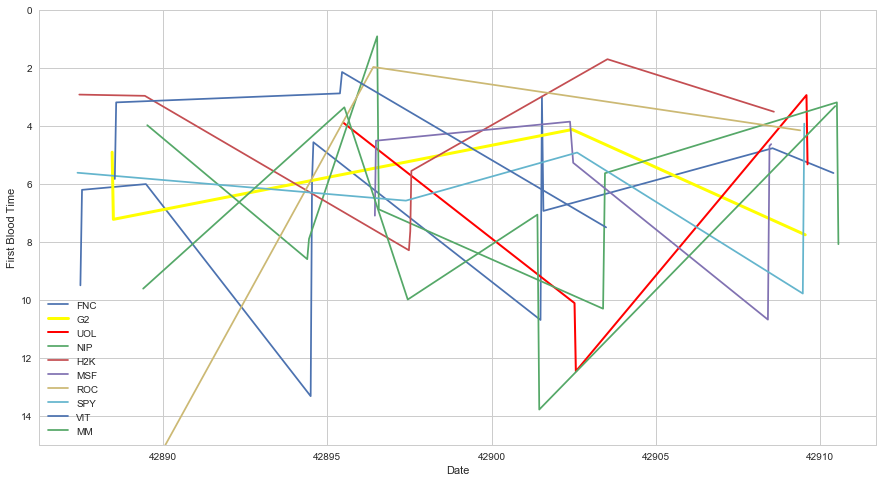

In [13]:
plt.figure(figsize=(15,8))

fnc = fbclimb('Fnatic')
plt.plot(fnc['date'],fnc['fbtime'],label='FNC')

g2 = fbclimb('G2 Esports')
plt.plot(g2['date'],g2['fbtime'],label='G2',color='yellow',lw=3)

uol = fbclimb('Unicorns of Love')
plt.plot(uol['date'],uol['fbtime'],label='UOL',color='red',lw=2)

nip = fbclimb('Ninjas in Pyjamas')
plt.plot(nip['date'],nip['fbtime'],label='NIP')

h2k = fbclimb('H2K')
plt.plot(h2k['date'],h2k['fbtime'],label='H2K')

msf = fbclimb('Misfits')
plt.plot(msf['date'],msf['fbtime'],label='MSF')

roc = fbclimb('Roccat')
plt.plot(roc['date'],roc['fbtime'],label='ROC')

spy = fbclimb('Splyce')
plt.plot(spy['date'],spy['fbtime'],label='SPY')

vit = fbclimb('Vitality')
plt.plot(vit['date'],vit['fbtime'],label='VIT')

mm = fbclimb('Mysterious Monkeys')
plt.plot(mm['date'],mm['fbtime'],label='MM')



plt.xlabel('Date')
plt.ylabel('First Blood Time')

plt.ylim(0,15)

plt.gca().invert_yaxis()
sb.set_style("whitegrid")
grid(True)
plt.legend()
plt.plot()
plt.show()

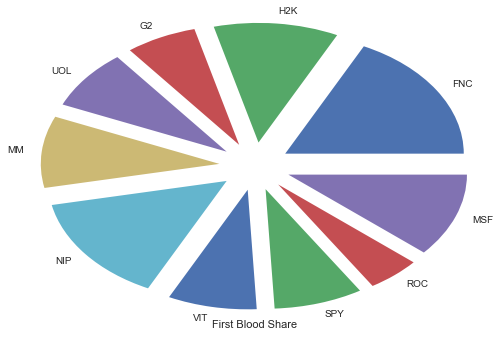

In [4]:
plist = pd.DataFrame(fbpie('Fnatic'))
plist = plist.append(fbpie('H2K'))
plist = plist.append(fbpie('G2 Esports'))
plist = plist.append(fbpie('Unicorns of Love'))
plist = plist.append(fbpie('Mysterious Monkeys'))
plist = plist.append(fbpie('Ninjas in Pyjamas'))
plist = plist.append(fbpie('Vitality'))
plist = plist.append(fbpie('Splyce'))
plist = plist.append(fbpie('Roccat'))
plist = plist.append(fbpie('Misfits'))
labels = 'FNC', 'H2K', 'G2', 'UOL', 'MM', 'NIP', 'VIT', 'SPY', 'ROC', 'MSF'
plt.xlabel('First Blood Share')
ex = [0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]
plt.pie(plist.iloc[:,1], labels=labels, explode=ex)
plt.show()

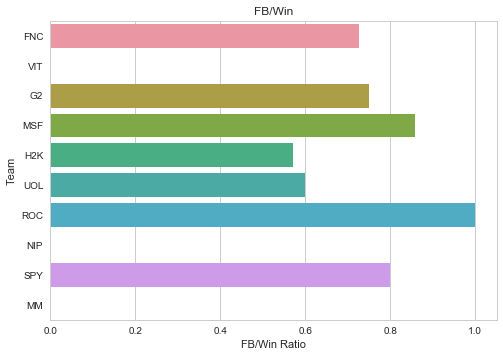

In [27]:
da = pd.DataFrame([[fbwin('Fnatic'),'FNC']])
da = da.append([[fbwin('Vitality'),'VIT']])
da = da.append([[fbwin('G2 Esports'),'G2']])
da = da.append([[fbwin('Misfits'),'MSF']])
da = da.append([[fbwin('H2K'),'H2K']])
da = da.append([[fbwin('Unicorns of Love'),'UOL']])
da = da.append([[fbwin('Roccat'),'ROC']])
da = da.append([[fbwin('Ninjas in Pyjamas'),'NIP']])
da = da.append([[fbwin('Splyce'),'SPY']])
da = da.append([[fbwin('Mysterious Monkeys'),'MM']])
da=da.rename(columns = {0:'FBW'})
da=da.rename(columns = {1:'Team'})
sb.barplot('FBW','Team',data=da)
plt.xlabel('FB/Win Ratio')
plt.title("FB/Win")
sb.set_style("whitegrid")
plt.show()

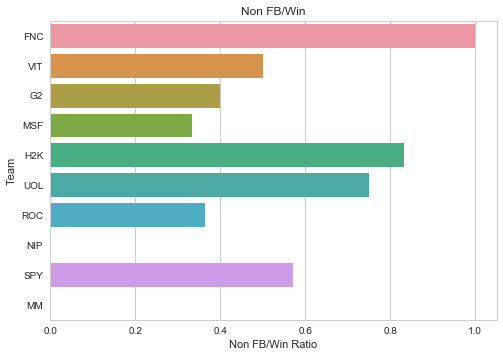

In [25]:
dw = pd.DataFrame([[nfbwin('Fnatic'),'FNC']])
dw = dw.append([[nfbwin('Vitality'),'VIT']])
dw = dw.append([[nfbwin('G2 Esports'),'G2']])
dw = dw.append([[nfbwin('Misfits'),'MSF']])
dw = dw.append([[nfbwin('H2K'),'H2K']])
dw = dw.append([[nfbwin('Unicorns of Love'),'UOL']])
dw = dw.append([[nfbwin('Roccat'),'ROC']])
dw = dw.append([[nfbwin('Ninjas in Pyjamas'),'NIP']])
dw = dw.append([[nfbwin('Splyce'),'SPY']])
dw = dw.append([[nfbwin('Mysterious Monkeys'),'MM']])
dw=dw.rename(columns = {0:'NFBW'})
dw=dw.rename(columns = {1:'Team'})
sb.barplot('NFBW','Team',data=dw)
plt.xlabel('Non FB/Win Ratio')
plt.title("Non FB/Win")
sb.set_style("whitegrid")
sb.set_style("whitegrid")
plt.show()

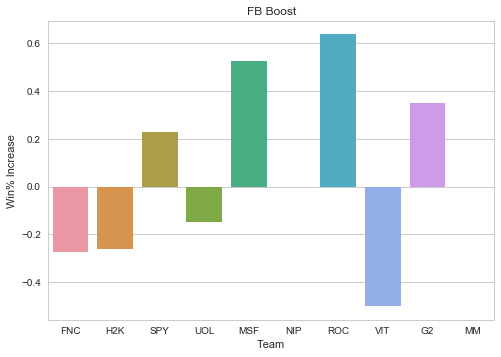

In [26]:
bst = pd.DataFrame([[boost('Fnatic'),'FNC']])
bst = bst.append([[boost('H2K'),'H2K']])
bst = bst.append([[boost('Splyce'),'SPY']])
bst = bst.append([[boost('Unicorns of Love'),'UOL']])
bst = bst.append([[boost('Misfits'),'MSF']])
bst = bst.append([[boost('Ninjas in Pyjamas'),'NIP']])
bst = bst.append([[boost('Roccat'),'ROC']])
bst = bst.append([[boost('Vitality'),'VIT']])
bst = bst.append([[boost('G2 Esports'),'G2']])
bst = bst.append([[boost('Mysterious Monkeys'),'MM']])


bst=bst.rename(columns = {0:'Boost'})
bst=bst.rename(columns = {1:'Team'})
sb.barplot('Team','Boost',data=bst)
plt.ylabel('Win% Increase')
sb.set_style("whitegrid")
plt.title("FB Boost")
plt.show()

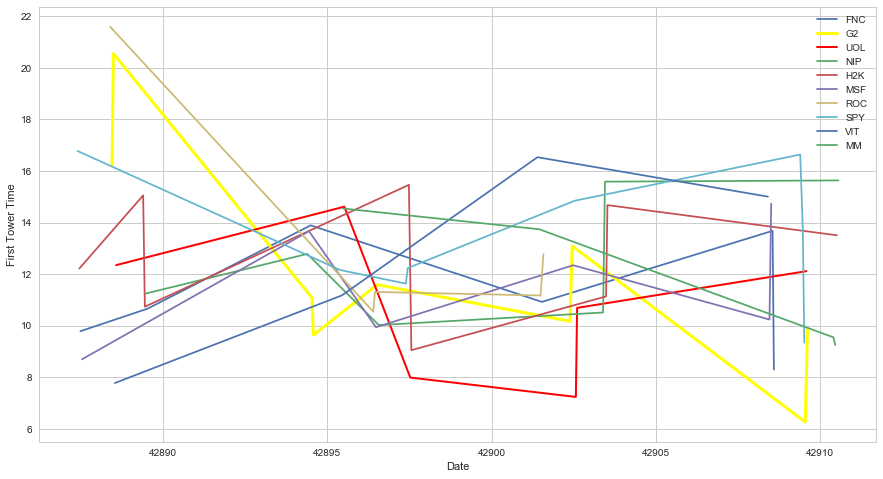

In [7]:
plt.figure(figsize=(15,8))

fnc = ftclimb('Fnatic')
plt.plot(fnc['date'],fnc['fttime'],label='FNC')

g2 = ftclimb('G2 Esports')
plt.plot(g2['date'],g2['fttime'],label='G2',color='yellow',lw=3)

uol = ftclimb('Unicorns of Love')
plt.plot(uol['date'],uol['fttime'],label='UOL',color='red',lw=2)

nip = ftclimb('Ninjas in Pyjamas')
plt.plot(nip['date'],nip['fttime'],label='NIP')

h2k = ftclimb('H2K')
plt.plot(h2k['date'],h2k['fttime'],label='H2K')

msf = ftclimb('Misfits')
plt.plot(msf['date'],msf['fttime'],label='MSF')

roc = ftclimb('Roccat')
plt.plot(roc['date'],roc['fttime'],label='ROC')

spy = ftclimb('Splyce')
plt.plot(spy['date'],spy['fttime'],label='SPY')

vit = ftclimb('Vitality')
plt.plot(vit['date'],vit['fttime'],label='VIT')

mm = ftclimb('Mysterious Monkeys')
plt.plot(mm['date'],mm['fttime'],label='MM')

plt.ylabel('First Tower Time')
plt.xlabel('Date')
sb.set_style("whitegrid")
plt.plot()
grid(True)
plt.legend()
plt.show()

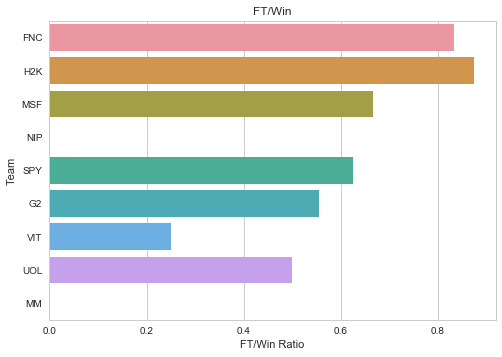

In [29]:
ftw = pd.DataFrame([[ftwin('Fnatic'),'FNC']])
ftw = ftw.append([[ftwin('H2K'),'H2K']])
ftw = ftw.append([[ftwin('Misfits'),'MSF']])
ftw = ftw.append([[ftwin('Ninjas in Pyjamas'),'NIP']])
ftw = ftw.append([[ftwin('Splyce'),'SPY']])
ftw = ftw.append([[ftwin('G2 Esports'),'G2']])
ftw = ftw.append([[ftwin('Vitality'),'VIT']])
ftw = ftw.append([[ftwin('G2 Esports'),'G2']])
ftw = ftw.append([[ftwin('Unicorns of Love'),'UOL']])
ftw = ftw.append([[ftwin('Mysterious Monkeys'),'MM']])

ftw=ftw.rename(columns = {0: 'FTW'})
ftw=ftw.rename(columns = {1: 'Team'})
sb.barplot('FTW','Team',data=ftw)
plt.title("FT/Win")
sb.set_style("whitegrid")
plt.xlabel('FT/Win Ratio')
plt.show()

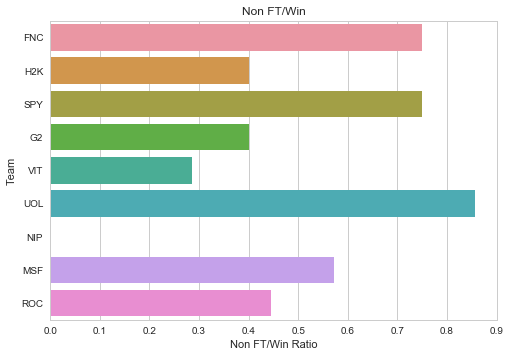

In [34]:
nft = pd.DataFrame([[nftwin('Fnatic'),'FNC']])
nft = nft.append([[nftwin('H2K'),'H2K']])
nft = nft.append([[nftwin('Splyce'),'SPY']])
nft = nft.append([[nftwin('G2 Esports'),'G2']])
nft = nft.append([[nftwin('Vitality'),'VIT']])
nft = nft.append([[nftwin('Unicorns of Love'),'UOL']])
nft = nft.append([[nftwin('Ninjas in Pyjamas'),'NIP']])
nft = nft.append([[nftwin('Misfits'),'MSF']])
nft = nft.append([[nftwin('Roccat'),'ROC']])

nft=nft.rename(columns = {0: 'NFT'})
nft=nft.rename(columns = {1: 'Team'})
sb.barplot('NFT','Team',data=nft)
plt.title("Non FT/Win")
sb.set_style("whitegrid")
plt.xlabel('Non FT/Win Ratio')
plt.show()

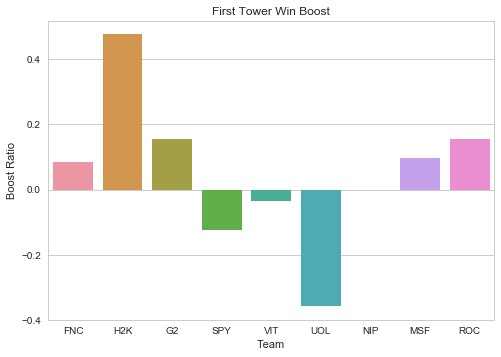

In [35]:
fbst = pd.DataFrame([[tboost('Fnatic'),'FNC']])
fbst = fbst.append([[tboost('H2K'),'H2K']])
fbst = fbst.append([[tboost('G2 Esports'),'G2']])
fbst = fbst.append([[tboost('Splyce'),'SPY']])
fbst = fbst.append([[tboost('Vitality'),'VIT']])
fbst = fbst.append([[tboost('Unicorns of Love'),'UOL']])
fbst = fbst.append([[tboost('Ninjas in Pyjamas'),'NIP']])
fbst = fbst.append([[tboost('Misfits'),'MSF']])
fbst = fbst.append([[tboost('Roccat'),'ROC']])

fbst=fbst.rename(columns = {0: 'FTBST'})
fbst=fbst.rename(columns = {1: 'Team'})
sb.barplot('Team','FTBST',data=fbst)
sb.set_style("whitegrid")
plt.title("First Tower Win Boost")
plt.ylabel('Boost Ratio')
plt.show()

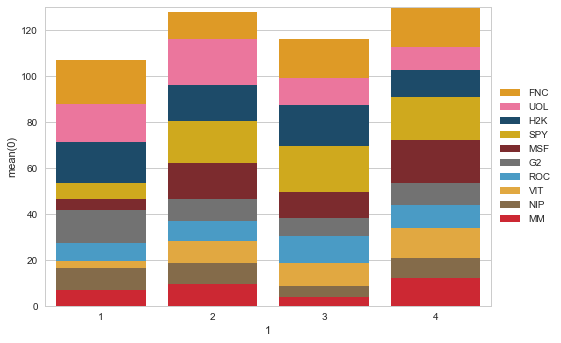

In [11]:
afnc = teamk('Fnatic', 2)
afnc = afnc.append(teamk('Fnatic',3))
afnc = afnc.append(teamk('Fnatic',4))
afnc = afnc.append(teamk('Fnatic',5))

auol = teamk('Unicorns of Love', 2)
auol = auol.append(teamk('Unicorns of Love',3))
auol = auol.append(teamk('Unicorns of Love',4))
auol = auol.append(teamk('Unicorns of Love',5))

ah2k = teamk('H2K', 2)  
ah2k = ah2k.append(teamk('H2K',3))
ah2k = ah2k.append(teamk('H2K',4))
ah2k = ah2k.append(teamk('H2K',5))

aspy = teamk('Splyce', 2)
aspy = aspy.append(teamk('Splyce', 3))
aspy = aspy.append(teamk('Splyce', 4))
aspy = aspy.append(teamk('Splyce', 5))

ag2 = teamk('G2 Esports', 2)
ag2 = ag2.append(teamk('G2 Esports', 3))
ag2 = ag2.append(teamk('G2 Esports', 4))
ag2 = ag2.append(teamk('G2 Esports', 5))

aroc = teamk('Roccat', 2)
aroc = aroc.append(teamk('Roccat', 3))
aroc = aroc.append(teamk('Roccat', 4))
aroc = aroc.append(teamk('Roccat', 5))

anip = teamk('Ninjas in Pyjamas', 2)
anip = anip.append(teamk('Ninjas in Pyjamas', 3))
anip = anip.append(teamk('Ninjas in Pyjamas', 4))
anip = anip.append(teamk('Ninjas in Pyjamas', 5))

amsf = teamk('Misfits', 2)
amsf = amsf.append(teamk('Misfits', 3))
amsf = amsf.append(teamk('Misfits', 4))
amsf = amsf.append(teamk('Misfits', 5))

avit = teamk('Vitality', 2)
avit = avit.append(teamk('Vitality', 3))
avit = avit.append(teamk('Vitality', 4))
avit = avit.append(teamk('Vitality', 5))

amm = teamk('Mysterious Monkeys', 2)
amm = amm.append(teamk('Mysterious Monkeys', 3 ))
amm = amm.append(teamk('Mysterious Monkeys', 4 ))
amm = amm.append(teamk('Mysterious Monkeys', 5 ))

amm['adjj'] = amm[0]
anip['adjj'] = anip[0] + amm[0]
avit['adjj'] = avit[0] + anip['adjj']
aroc['adjj'] = aroc[0] + avit['adjj']
ag2['adjj'] = ag2[0] + aroc['adjj']
amsf['adjj'] = amsf[0] + ag2['adjj']
aspy['adjj'] = aspy[0]+amsf['adjj']
ah2k['adjj'] = ah2k[0] + aspy['adjj']
auol['adjj'] = auol[0] + ah2k['adjj']
afnc['adjj'] = afnc[0] + auol['adjj']

sb.barplot(1,'adjj',data=afnc, label='FNC',color='#fda207')
sb.barplot(1,'adjj',data=auol, label='UOL',color='#ff6297')
sb.barplot(1,'adjj',data=ah2k, label='H2K',color='#104e76')
sb.barplot(1,'adjj',data=aspy, label='SPY', color='#edba00')
sb.barplot(1,'adjj',data=amsf, label='MSF',color='#8a1d21')
sb.barplot(1,'adjj',data=ag2, label='G2',color='#727272')
sb.barplot(1,'adjj',data=aroc, label='ROC',color='#35a2da')
sb.barplot(1,'adjj',data=avit, label='VIT',color='#fcaf26')
sb.barplot(1,'adjj',data=anip, label='NIP',color='#8d6c41')
sb.barplot(1,0,data=amm, label='MM',color='#e70d1b')


plt.ylim(0,130)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show() 

In [12]:
from bokeh.models.widgets import Panel, Tabs

fnc = agt('Fnatic')
fnc = fnc.sort_values('date')
uol = agt('Unicorns of Love')
uol = uol.sort_values('date')
h2k = agt('H2K')
h2k = h2k.sort_values('date')
spy = agt('Splyce')
spy = spy.sort_values('date')
msf = agt('Misfits')
msf = msf.sort_values('date')
g2 =  agt('G2 Esports')
g2 = g2.sort_values('date')
roc = agt('Roccat')
roc = roc.sort_values('date')
vit = agt('Vitality')
vit = vit.sort_values('date')
nip = agt('Ninjas in Pyjamas')
nip = nip.sort_values('date')
mm = agt('Mysterious Monkeys')
mm = mm.sort_values('date')

p = figure(plot_width=900, plot_height=300)

p.line(uol['date'], uol['gt'], line_width=1,color='#cdcdcd')
p.line(h2k['date'], h2k['gt'], line_width=1,color='#cdcdcd')
p.line(spy['date'], spy['gt'], line_width=1,color='#cdcdcd')
p.line(msf['date'], msf['gt'], line_width=1,color='#cdcdcd')
p.line(g2['date'], g2['gt'], line_width=1,color='#cdcdcd')
p.line(roc['date'], roc['gt'], line_width=1,color='#cdcdcd')
p.line(vit['date'], vit['gt'], line_width=1,color='#cdcdcd')
p.line(nip['date'], nip['gt'], line_width=1,color='#cdcdcd')
p.line(mm['date'], mm['gt'], line_width=1,color='#cdcdcd')
p.line(fnc['date'], fnc['gt'], line_width=3,color='orange')
tab1 = Panel(child=p, title="FNC")

p2 = figure(plot_width=900, plot_height=300)
p2.line(fnc['date'], fnc['gt'], line_width=1,color='#cdcdcd')
p2.line(h2k['date'], h2k['gt'], line_width=1,color='#cdcdcd')
p2.line(spy['date'], spy['gt'], line_width=1,color='#cdcdcd')
p2.line(msf['date'], msf['gt'], line_width=1,color='#cdcdcd')
p2.line(g2['date'], g2['gt'], line_width=1,color='#cdcdcd')
p2.line(roc['date'], roc['gt'], line_width=1,color='#cdcdcd')
p2.line(vit['date'], vit['gt'], line_width=1,color='#cdcdcd')
p2.line(nip['date'], nip['gt'], line_width=1,color='#cdcdcd')
p2.line(mm['date'], mm['gt'], line_width=1,color='#cdcdcd')
p2.line(uol['date'], uol['gt'], line_width=3,color='red')
tab2 = Panel(child=p2, title="UOL")

p3 = figure(plot_width=900, plot_height=300)
p3.line(fnc['date'], fnc['gt'], line_width=1,color='#cdcdcd')
p3.line(spy['date'], spy['gt'], line_width=1,color='#cdcdcd')
p3.line(msf['date'], msf['gt'], line_width=1,color='#cdcdcd')
p3.line(g2['date'], g2['gt'], line_width=1,color='#cdcdcd')
p3.line(roc['date'], roc['gt'], line_width=1,color='#cdcdcd')
p3.line(vit['date'], vit['gt'], line_width=1,color='#cdcdcd')
p3.line(nip['date'], nip['gt'], line_width=1,color='#cdcdcd')
p3.line(mm['date'], mm['gt'], line_width=1,color='#cdcdcd')
p3.line(uol['date'], uol['gt'], line_width=1,color='#cdcdcd')
p3.line(h2k['date'], h2k['gt'], line_width=3,color='blue')
tab3 = Panel(child=p3, title="H2K")

p4 = figure(plot_width=900, plot_height=300)
p4.line(fnc['date'], fnc['gt'], line_width=1,color='#cdcdcd')
p4.line(msf['date'], msf['gt'], line_width=1,color='#cdcdcd')
p4.line(g2['date'], g2['gt'], line_width=1,color='#cdcdcd')
p4.line(roc['date'], roc['gt'], line_width=1,color='#cdcdcd')
p4.line(vit['date'], vit['gt'], line_width=1,color='#cdcdcd')
p4.line(nip['date'], nip['gt'], line_width=1,color='#cdcdcd')
p4.line(mm['date'], mm['gt'], line_width=1,color='#cdcdcd')
p4.line(uol['date'], uol['gt'], line_width=1,color='#cdcdcd')
p4.line(h2k['date'], h2k['gt'], line_width=1,color='#cdcdcd')
p4.line(spy['date'], spy['gt'], line_width=3,color='yellow')
tab4 = Panel(child=p4, title="SPY")

p5 = figure(plot_width=900, plot_height=300)
p5.line(fnc['date'], fnc['gt'], line_width=1,color='#cdcdcd')
p5.line(g2['date'], g2['gt'], line_width=1,color='#cdcdcd')
p5.line(roc['date'], roc['gt'], line_width=1,color='#cdcdcd')
p5.line(vit['date'], vit['gt'], line_width=1,color='#cdcdcd')
p5.line(nip['date'], nip['gt'], line_width=1,color='#cdcdcd')
p5.line(mm['date'], mm['gt'], line_width=1,color='#cdcdcd')
p5.line(uol['date'], uol['gt'], line_width=1,color='#cdcdcd')
p5.line(h2k['date'], h2k['gt'], line_width=1,color='#cdcdcd')
p5.line(spy['date'], spy['gt'], line_width=1,color='#cdcdcd')
p5.line(msf['date'], msf['gt'], line_width=3,color='red')
tab5 = Panel(child=p5, title="MSF")

p6 = figure(plot_width=900, plot_height=300)
p6.line(fnc['date'], fnc['gt'], line_width=1,color='#cdcdcd')
p6.line(roc['date'], roc['gt'], line_width=1,color='#cdcdcd')
p6.line(vit['date'], vit['gt'], line_width=1,color='#cdcdcd')
p6.line(nip['date'], nip['gt'], line_width=1,color='#cdcdcd')
p6.line(mm['date'], mm['gt'], line_width=1,color='#cdcdcd')
p6.line(uol['date'], uol['gt'], line_width=1,color='#cdcdcd')
p6.line(h2k['date'], h2k['gt'], line_width=1,color='#cdcdcd')
p6.line(spy['date'], spy['gt'], line_width=1,color='#cdcdcd')
p6.line(msf['date'], msf['gt'], line_width=1,color='#cdcdcd')
p6.line(g2['date'], g2['gt'], line_width=3,color='black')
tab6 = Panel(child=p6, title="G2")

p7 = figure(plot_width=900, plot_height=300)
p7.line(fnc['date'], fnc['gt'], line_width=1,color='#cdcdcd')
p7.line(vit['date'], vit['gt'], line_width=1,color='#cdcdcd')
p7.line(nip['date'], nip['gt'], line_width=1,color='#cdcdcd')
p7.line(mm['date'], mm['gt'], line_width=1,color='#cdcdcd')
p7.line(uol['date'], uol['gt'], line_width=1,color='#cdcdcd')
p7.line(h2k['date'], h2k['gt'], line_width=1,color='#cdcdcd')
p7.line(spy['date'], spy['gt'], line_width=1,color='#cdcdcd')
p7.line(msf['date'], msf['gt'], line_width=1,color='#cdcdcd')
p7.line(g2['date'], g2['gt'], line_width=3,color='#cdcdcd')
p7.line(roc['date'], roc['gt'], line_width=1,color='indigo')
tab7 = Panel(child=p7, title="ROC")


p8 = figure(plot_width=900, plot_height=300)
p8.line(fnc['date'], fnc['gt'], line_width=1,color='#cdcdcd')
p8.line(nip['date'], nip['gt'], line_width=1,color='#cdcdcd')
p8.line(mm['date'], mm['gt'], line_width=1,color='#cdcdcd')
p8.line(uol['date'], uol['gt'], line_width=1,color='#cdcdcd')
p8.line(h2k['date'], h2k['gt'], line_width=1,color='#cdcdcd')
p8.line(spy['date'], spy['gt'], line_width=1,color='#cdcdcd')
p8.line(msf['date'], msf['gt'], line_width=1,color='#cdcdcd')
p8.line(g2['date'], g2['gt'], line_width=1,color='#cdcdcd')
p8.line(roc['date'], roc['gt'], line_width=1,color='#cdcdcd')
p8.line(vit['date'], vit['gt'], line_width=3,color='gold')
tab8 = Panel(child=p8, title="VIT")

p9 = figure(plot_width=900, plot_height=300)
p9.line(fnc['date'], fnc['gt'], line_width=1,color='#cdcdcd')
p9.line(mm['date'], mm['gt'], line_width=1,color='#cdcdcd')
p9.line(uol['date'], uol['gt'], line_width=1,color='#cdcdcd')
p9.line(h2k['date'], h2k['gt'], line_width=1,color='#cdcdcd')
p9.line(spy['date'], spy['gt'], line_width=1,color='#cdcdcd')
p9.line(msf['date'], msf['gt'], line_width=1,color='#cdcdcd')
p9.line(g2['date'], g2['gt'], line_width=1,color='#cdcdcd')
p9.line(roc['date'], roc['gt'], line_width=1,color='#cdcdcd')
p9.line(vit['date'], vit['gt'], line_width=1,color='#cdcdcd')
p9.line(nip['date'], nip['gt'], line_width=3,color='brown')
tab9 = Panel(child=p9, title="NIP")

p10 = figure(plot_width=900, plot_height=300)
p10.line(fnc['date'], fnc['gt'], line_width=1,color='#cdcdcd')
p10.line(uol['date'], uol['gt'], line_width=1,color='#cdcdcd')
p10.line(h2k['date'], h2k['gt'], line_width=1,color='#cdcdcd')
p10.line(spy['date'], spy['gt'], line_width=1,color='#cdcdcd')
p10.line(msf['date'], msf['gt'], line_width=1,color='#cdcdcd')
p10.line(g2['date'], g2['gt'], line_width=1,color='#cdcdcd')
p10.line(roc['date'], roc['gt'], line_width=1,color='#cdcdcd')
p10.line(vit['date'], vit['gt'], line_width=1,color='#cdcdcd')
p10.line(nip['date'], nip['gt'], line_width=1,color='#cdcdcd')
p10.line(mm['date'], mm['gt'], line_width=3,color='green')
tab10 = Panel(child=p10, title="MM")


tabs = Tabs(tabs=[ tab1, tab2,tab3,tab4,tab5,tab6,tab7,tab8,tab9,tab10 ])

show(tabs)


In [13]:
from bokeh.charts import Area, show, output_file, defaults
from bokeh.layouts import row

defaults.width = 700
defaults.height = 300

data = dict(
    FNC=[   19.500000,12.000000,17.333333,18.500000],
    UOL=[  16.500000,20.000000,11.666667,9.666667],
    H2K=[ 17.750000,15.666667,17.500000,12.000000],
    SPY=[   7.000000,18.000000,20.000000,18.666667],
    MSF=[    4.500000,16.000000,11.666667,18.666667],
    G2 =[14.333333,9.600000,7.666667,9.666667],
    ROC=[8.000000,8.666667,11.600000,10.000000],
    VIT=[3.000000,9.500000,10.250000,12.666667],
    NIP= [ 9.5, 9.0,4.5,9.0],
    MM=[ 7.0,9.5,4.0,12.0]
)

area = Area(data, title="Stacked Area Chart", legend="top_left",stack=True, xlabel='Week', ylabel='Kill Share')
area.line(0,2, line_width=3,color='yellow')
show(area)

C:\Users\John Vincent\Anaconda3\lib\site-packages\bokeh\util\deprecation.py:34: BokehDeprecationWarning: 
The bokeh.charts API has moved to a separate 'bkcharts' package.

This compatibility shim will remain until Bokeh 1.0 is released.
After that, if you want to use this API you will have to install
the bkcharts package explicitly.

  warn(message)


In [64]:
from bokeh.models.widgets import Panel, Tabs

fnc = pd.DataFrame([kps('Fnatic',2)])
fnc = fnc.append([kps('Fnatic',3)])
fnc = fnc.append([kps('Fnatic',4)])
fnc = fnc.append([kps('Fnatic',5)])
fnc=fnc.rename(columns = {0: 'Structure Rating'})
fnc=fnc.rename(columns = {1: 'KPS'})
fnc=fnc.rename(columns = {2: 'Week'})
fnc=fnc.rename(columns = {3: 'Team'})

uol = pd.DataFrame([kps('Unicorns of Love',2)])
uol = uol.append([kps('Unicorns of Love',3)])
uol = uol.append([kps('Unicorns of Love',4)])
uol = uol.append([kps('Unicorns of Love',5)])
uol=uol.rename(columns = {0: 'Structure Rating'})
uol=uol.rename(columns = {1: 'KPS'})
uol=uol.rename(columns = {2: 'Week'})
uol=uol.rename(columns = {3: 'Team'})

mm = pd.DataFrame([kps('Mysterious Monkeys',2)])
mm = mm.append([kps('Mysterious Monkeys',3)])
mm = mm.append([kps('Mysterious Monkeys',4)])
mm = mm.append([kps('Mysterious Monkeys',5)])
mm=mm.rename(columns = {0: 'Structure Rating'})
mm=mm.rename(columns = {1: 'KPS'})
mm=mm.rename(columns = {2: 'Week'})
mm=mm.rename(columns = {3: 'Team'})

g2 = pd.DataFrame([kps('G2 Esports',2)])
g2 = g2.append([kps('G2 Esports',3)])
g2 = g2.append([kps('G2 Esports',4)])
g2 = g2.append([kps('G2 Esports',5)])
g2=g2.rename(columns = {0: 'Structure Rating'})
g2=g2.rename(columns = {1: 'KPS'})
g2=g2.rename(columns = {2: 'Week'})
g2=g2.rename(columns = {3: 'Team'})

h2k = pd.DataFrame([kps('H2K',2)])
h2k = h2k.append([kps('H2K',3)])
h2k = h2k.append([kps('H2K',4)])
h2k = h2k.append([kps('H2K',5)])
h2k=h2k.rename(columns = {0: 'Structure Rating'})
h2k=h2k.rename(columns = {1: 'KPS'})
h2k=h2k.rename(columns = {2: 'Week'})
h2k=h2k.rename(columns = {3: 'Team'})

nip = pd.DataFrame([kps('Ninjas in Pyjamas', 2)])
nip = nip.append([kps('Ninjas in Pyjamas',3)])
nip = nip.append([kps('Ninjas in Pyjamas',4)])
nip = nip.append([kps('Ninjas in Pyjamas',5)])
nip = nip.rename(columns = {0: 'Structure Rating'})
nip = nip.rename(columns = {1: 'KPS'})
nip = nip.rename(columns = {2: 'Week'})
nip = nip.rename(columns = {3: 'Team'}) 

roc = pd.DataFrame([kps('Roccat', 2)])
roc = roc.append([kps('Roccat', 3)])
roc = roc.append([kps('Roccat', 4)])
roc = roc.append([kps('Roccat', 5)])
roc=roc.rename(columns = {0: 'Structure Rating'})
roc=roc.rename(columns = {1: 'KPS'})
roc=roc.rename(columns = {2: 'Week'})
roc=roc.rename(columns = {3: 'Team'})

spy = pd.DataFrame([kps('Splyce', 2)])
spy = spy.append([kps('Splyce', 3)])
spy = spy.append([kps('Splyce', 4)])
spy = spy.append([kps('Splyce', 5)])
spy = spy.rename(columns = {0: 'Structure Rating'})
spy = spy.rename(columns = {1: 'KPS'})
spy = spy.rename(columns = {2: 'Week'})
spy = spy.rename(columns = {3: 'Team'})

msf = pd.DataFrame([kps('Misfits', 2)])
msf = msf.append([kps('Misfits', 3)])
msf = msf.append([kps('Misfits', 4)])
msf = msf.append([kps('Misfits', 5)])
msf = msf.rename(columns = {0: 'Structure Rating'})
msf = msf.rename(columns = {1: 'KPS'})
msf = msf.rename(columns = {2: 'Week'})
msf = msf.rename(columns = {3: 'Team'})

vit = pd.DataFrame([kps('Vitality', 2)])
vit = vit.append([kps('Vitality', 3)])
vit = vit.append([kps('Vitality', 4)])
vit = vit.append([kps('Vitality', 5)])
vit = vit.rename(columns = {0: 'Structure Rating'})
vit = vit.rename(columns = {1: 'KPS'})
vit = vit.rename(columns = {2: 'Week'})
vit = vit.rename(columns = {3: 'Team'})


s = figure(plot_width=900, plot_height=300)

s.line(fnc['Week'], fnc['KPS'], line_width=4,color='blue')
s.line(uol['Week'], uol['KPS'], line_width=1,color='grey')
s.line(mm['Week'], mm['KPS'], line_width=1,color='grey')
s.line(g2['Week'], g2['KPS'], line_width=1,color='grey')
s.line(h2k['Week'], h2k['KPS'], line_width=1,color='grey')
s.line(nip['Week'], nip['KPS'], line_width=1,color='grey')
s.line(roc['Week'], roc['KPS'], line_width=1,color='grey')
s.line(spy['Week'], spy['KPS'], line_width=1,color='grey')
s.line(msf['Week'], msf['KPS'], line_width=1,color='grey')
s.line(vit['Week'], vit['KPS'], line_width=1,color='grey')
tab1 = Panel(child=s, title="FNC")

s2 = figure(plot_width=900, plot_height=300)
s2.line(fnc['Week'], fnc['KPS'], line_width=1,color='grey')
s2.line(uol['Week'], uol['KPS'], line_width=4,color='blue')
s2.line(mm['Week'], mm['KPS'], line_width=1,color='grey')
s2.line(g2['Week'], g2['KPS'], line_width=1,color='grey')
s2.line(h2k['Week'], h2k['KPS'], line_width=1,color='grey')
s2.line(nip['Week'], nip['KPS'], line_width=1,color='grey')
s2.line(roc['Week'], roc['KPS'], line_width=1,color='grey')
s2.line(spy['Week'], spy['KPS'], line_width=1,color='grey')
s2.line(msf['Week'], msf['KPS'], line_width=1,color='grey')
s2.line(vit['Week'], vit['KPS'], line_width=1,color='grey')
tab2 = Panel(child=s2, title="UOL")

s3 = figure(plot_width=900, plot_height=300)
s3.line(fnc['Week'], fnc['KPS'], line_width=1,color='grey')
s3.line(uol['Week'], uol['KPS'], line_width=1,color='grey')
s3.line(mm['Week'], mm['KPS'], line_width=4,color='blue')
s3.line(g2['Week'], g2['KPS'], line_width=1,color='grey')
s3.line(h2k['Week'], h2k['KPS'], line_width=1,color='grey')
s3.line(nip['Week'], nip['KPS'], line_width=1,color='grey')
s3.line(roc['Week'], roc['KPS'], line_width=1,color='grey')
s3.line(spy['Week'], spy['KPS'], line_width=1,color='grey')
s3.line(msf['Week'], msf['KPS'], line_width=1,color='grey')
s3.line(vit['Week'], vit['KPS'], line_width=1,color='grey')
tab3 = Panel(child=s3, title="MM")

s4 = figure(plot_width=900, plot_height=300)
s4.line(fnc['Week'], fnc['KPS'], line_width=1,color='grey')
s4.line(uol['Week'], uol['KPS'], line_width=1,color='grey')
s4.line(mm['Week'], mm['KPS'], line_width=1,color='grey')
s4.line(g2['Week'], g2['KPS'], line_width=4,color='blue')
s4.line(h2k['Week'], h2k['KPS'], line_width=1,color='grey')
s4.line(nip['Week'], nip['KPS'], line_width=1,color='grey')
s4.line(roc['Week'], roc['KPS'], line_width=1,color='grey')
s4.line(spy['Week'], spy['KPS'], line_width=1,color='grey')
s4.line(msf['Week'], msf['KPS'], line_width=1,color='grey')
s4.line(vit['Week'], vit['KPS'], line_width=1,color='grey')
tab4 = Panel(child=s4, title="G2")

s5 = figure(plot_width=900, plot_height=300)
s5.line(fnc['Week'], fnc['KPS'], line_width=1,color='grey')
s5.line(uol['Week'], uol['KPS'], line_width=1,color='grey')
s5.line(mm['Week'], mm['KPS'], line_width=1,color='grey')
s5.line(g2['Week'], g2['KPS'], line_width=1,color='grey')
s5.line(h2k['Week'], h2k['KPS'], line_width=4,color='blue')
s5.line(nip['Week'], nip['KPS'], line_width=1,color='grey')
s5.line(roc['Week'], roc['KPS'], line_width=1,color='grey')
s5.line(spy['Week'], spy['KPS'], line_width=1,color='grey')
s5.line(msf['Week'], msf['KPS'], line_width=1,color='grey')
s5.line(vit['Week'], vit['KPS'], line_width=1,color='grey')
tab5 = Panel(child=s5, title="H2K")

s6 = figure(plot_width=900, plot_height=300)
s6.line(fnc['Week'], fnc['KPS'], line_width=1,color='grey')
s6.line(uol['Week'], uol['KPS'], line_width=1,color='grey')
s6.line(mm['Week'], mm['KPS'], line_width=1,color='grey')
s6.line(g2['Week'], g2['KPS'], line_width=1,color='grey')
s6.line(h2k['Week'], h2k['KPS'], line_width=1,color='grey')
s6.line(nip['Week'], nip['KPS'], line_width=4,color='blue')
s6.line(roc['Week'], roc['KPS'], line_width=1,color='grey')
s6.line(spy['Week'], spy['KPS'], line_width=1,color='grey')
s6.line(msf['Week'], msf['KPS'], line_width=1,color='grey')
s6.line(vit['Week'], vit['KPS'], line_width=1,color='grey')
tab6 = Panel(child=s6, title="NIP")

s7 = figure(plot_width=900, plot_height=300)
s7.line(fnc['Week'], fnc['KPS'], line_width=1,color='grey')
s7.line(uol['Week'], uol['KPS'], line_width=1,color='grey')
s7.line(mm['Week'], mm['KPS'], line_width=1,color='grey')
s7.line(g2['Week'], g2['KPS'], line_width=1,color='grey')
s7.line(h2k['Week'], h2k['KPS'], line_width=1,color='grey')
s7.line(nip['Week'], nip['KPS'], line_width=1,color='grey')
s7.line(roc['Week'], roc['KPS'], line_width=4,color='blue')
s7.line(spy['Week'], spy['KPS'], line_width=1,color='grey')
s7.line(msf['Week'], msf['KPS'], line_width=1,color='grey')
s7.line(vit['Week'], vit['KPS'], line_width=1,color='grey')
tab7 = Panel(child=s7, title="ROC")

s8 = figure(plot_width=900, plot_height=300)
s8.line(fnc['Week'], fnc['KPS'], line_width=1,color='grey')
s8.line(uol['Week'], uol['KPS'], line_width=1,color='grey')
s8.line(mm['Week'], mm['KPS'], line_width=1,color='grey')
s8.line(g2['Week'], g2['KPS'], line_width=1,color='grey')
s8.line(h2k['Week'], h2k['KPS'], line_width=1,color='grey')
s8.line(nip['Week'], nip['KPS'], line_width=1,color='grey')
s8.line(roc['Week'], roc['KPS'], line_width=1,color='grey')
s8.line(spy['Week'], spy['KPS'], line_width=4,color='blue')
s8.line(msf['Week'], msf['KPS'], line_width=1,color='grey')
s8.line(vit['Week'], vit['KPS'], line_width=1,color='grey')
tab8 = Panel(child=s8, title="SPY")

s9 = figure(plot_width=900, plot_height=300)
s9.line(fnc['Week'], fnc['KPS'], line_width=1,color='grey')
s9.line(uol['Week'], uol['KPS'], line_width=1,color='grey')
s9.line(mm['Week'], mm['KPS'], line_width=1,color='grey')
s9.line(g2['Week'], g2['KPS'], line_width=1,color='grey')
s9.line(h2k['Week'], h2k['KPS'], line_width=1,color='grey')
s9.line(nip['Week'], nip['KPS'], line_width=1,color='grey')
s9.line(roc['Week'], roc['KPS'], line_width=1,color='grey')
s9.line(spy['Week'], spy['KPS'], line_width=1,color='grey')
s9.line(msf['Week'], msf['KPS'], line_width=4,color='blue')
s9.line(vit['Week'], vit['KPS'], line_width=1,color='grey')
tab9 = Panel(child=s9, title="MSF")

s10 = figure(plot_width=900, plot_height=300)
s10.line(fnc['Week'], fnc['KPS'], line_width=1,color='grey')
s10.line(uol['Week'], uol['KPS'], line_width=1,color='grey')
s10.line(mm['Week'], mm['KPS'], line_width=1,color='grey')
s10.line(g2['Week'], g2['KPS'], line_width=1,color='grey')
s10.line(h2k['Week'], h2k['KPS'], line_width=1,color='grey')
s10.line(nip['Week'], nip['KPS'], line_width=1,color='grey')
s10.line(roc['Week'], roc['KPS'], line_width=1,color='grey')
s10.line(spy['Week'], spy['KPS'], line_width=1,color='grey')
s10.line(msf['Week'], msf['KPS'], line_width=1,color='grey')
s10.line(vit['Week'], vit['KPS'], line_width=4,color='blue')
tab10 = Panel(child=s10, title="VIT")




tabs = Tabs(tabs=[tab1,tab2,tab3,tab4,tab5,tab6,tab7,tab8,tab9,tab10])


show(tabs)

print(fnc)


   Structure Rating       KPS  Week    Team
0               2.0  2.285714     1  Fnatic
0               1.5  2.000000     2  Fnatic
0               1.0  2.142857     3  Fnatic
0               1.5  2.642857     4  Fnatic


In [66]:
here = '%s'

fnc = here%(new.iloc[0,0])
uol = here%(new.iloc[1,0])
mm  = here%(new.iloc[2,0])
g2  = here%(new.iloc[3,0])
h2k = here%(new.iloc[4,0])
nip = here%(new.iloc[5,0])
roc = here%(new.iloc[6,0])
spy = here%(new.iloc[7,0])
msf = here%(new.iloc[8,0])
vit = here%(new.iloc[9,0])

1002100030
